# Submission 1 - Predictive Analytics

---
### My Identity
- Name : Robiul Awal
- ID Dicoding : robiul_awal
- Domicile : Yogyakarta
- Email : robbyulawal11@gmail.com
- Linkedin : https://www.linkedin.com/in/robiul-awal11/

---
<h1><center> Predicts which Passengers Survived The Titanic Shipwreck </h1></center>

### Introduction
<p align = "justify"> The sinking of the Titanic is one of the most famous shipwrecks in history.

On April 15, 1912, during its maiden voyage, the RMS Titanic, widely considered to be “unsinkable,” sank after colliding with an iceberg. Unfortunately, there were not enough lifeboats for everyone on board, resulting in the deaths of 1,502 of the 2,224 passengers and crew.

While there is some luck involved in survival, it appears that some groups of people are more likely to survive than others.

In this project, a predictive model will be built to answer the question: “what types of people are more likely to survive?” using passenger data (e.g. name, age, gender, socioeconomic class, etc.).

### Objective
<p align = "justify"> The goal of this study is to predict whether a passenger survived the sinking of the Titanic or not. For each question in the test set, you must predict a value of 0 or 1 for that variable.

### Dataset
<p align = "justify"> This dataset includes passenger information such as name, age, gender, socio-economic class, etc. There are two datasets, one dataset titled train.csv and the other titled test.csv.

Train.csv will contain details of some of the passengers on the plane (891 to be exact) and most importantly, it will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not reveal the “ground truth” for each passenger. The task at hand is to predict this outcome. Using the patterns found in the train.csv data, it will be predicted whether the other 418 passengers on the plane (found in test.csv) survived.

### Process
- <p align = "justify"> Data Collection: Data collection was done by downloading the dataset from the official reference source from Kaggle, namely at the following link https://www.kaggle.com/competitions/titanic/data.
- <p align = "justify"> Data Exploration and Analysis: Analyze data by visualizing data so that it can be easily understood and able to see the trends that occur.
- <p align = "justify"> Data preprocessing: cleaning data such as empty data, noise data or data that has no effect on data processing, and normalizing data.
- <p align = "justify"> Dataset Splitting: Splitting the dataset into training and testing sets for the model training process.
- <p align = "justify"> Model Building: Building a classification model using random forest, support vector machine, and K-Nearest Neighbor.
- <p align = "justify"> Model Training: Train the model on the training dataset by optimizing its parameters and weights so that it can recognize patterns in the data.
- <p align = "justify">Model Validation: Validate the model on a validation dataset to measure its performance and prevent overfitting.
- <p align = "justify">Evaluation and Tuning: Evaluate the model on the test dataset and adjust parameters if necessary.

Referensi
Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic

## 1. Importing Packages

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
# Import library for data cleaning
import pandas as pd
pd.options.mode.chained_assignment = None  # Disable chaining warnings
import numpy as np  # NumPy for numerical computing
seed = 0
np.random.seed(seed)  # Setting seeds for reproducibility

# Import library for visualitation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for statistical data visualization, setting visualization styles

# Import library for data preprocessing
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Import library for modelling and evaluation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 2. Loading Data

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load data from local and then extract it to the storage directory. |

---

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


> - Based on the output above, it can be seen that the train data has 891 samples (records or number of observations) or rows. - In addition, the train data has 12 columns or variables consisting of PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.


## 3. Exploratory Data Analysis (EDA)

---
    
| ⚡ Description: Exploratory Data Analysis ⚡ |
| :--------------------------- |
| These preprocessing steps aim to remove noise, convert text to a consistent format, and extract important features for further analysis. |

---


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>- Based on the output above, it can be seen that there are 5 variables of the int64 numeric data type.
- There are 2 variables of the float64 numeric data type.
- There are 5 variables of the character or object type.

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>Based on the output above, it can be seen that the average age of Titanic passengers was 29.69 years.

In [ ]:
dataNull = data_train.isnull().sum()
dataNull

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


>Based on the output above, it can be seen that there are 177 empty data in the Age variable, 697 data in the Cabin variable, and 2 data in the Embarked variable.

In [ ]:
# Checking for data duplication
any(data_train.duplicated())

False

>Based on the output above, it means that there is no duplicate data in the Titanic dataset used in this project.

### Univariate Analysis
Unvariate analysis is performed to determine the distribution of each variable in the dataset. This process produces a visualization that illustrates the comparison of distributions on each variable in the dataset.

In [3]:
numerical_features = ['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

        jumlah sampel  persentase
Sex                              
male              577        64.8
female            314        35.2


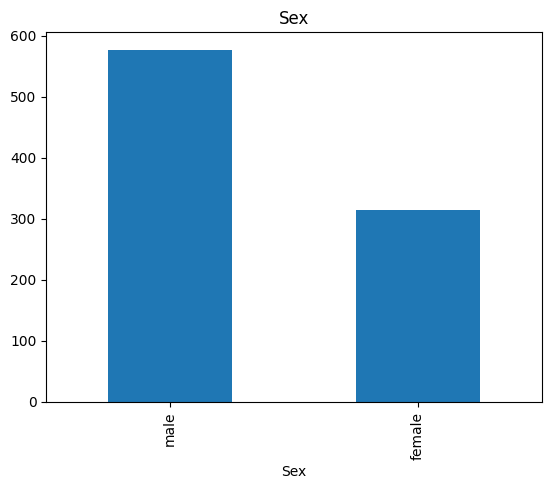

In [4]:
feature = categorical_features[0]
count = data_train[feature].value_counts()
percent = 100*data_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

>Based on the image above, it can be seen that there are more men than women.

          jumlah sampel  persentase
Embarked                           
S                   644        72.4
C                   168        18.9
Q                    77         8.7


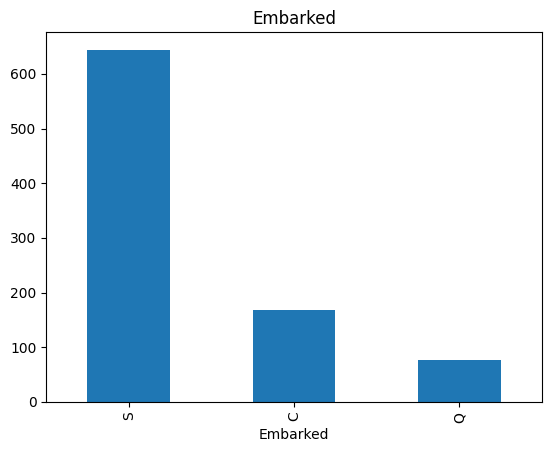

In [5]:
feature = categorical_features[1]
count = data_train[feature].value_counts()
percent = 100*data_train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

>Based on the image above, it can be seen that most passengers depart from port S (Shouthampton).

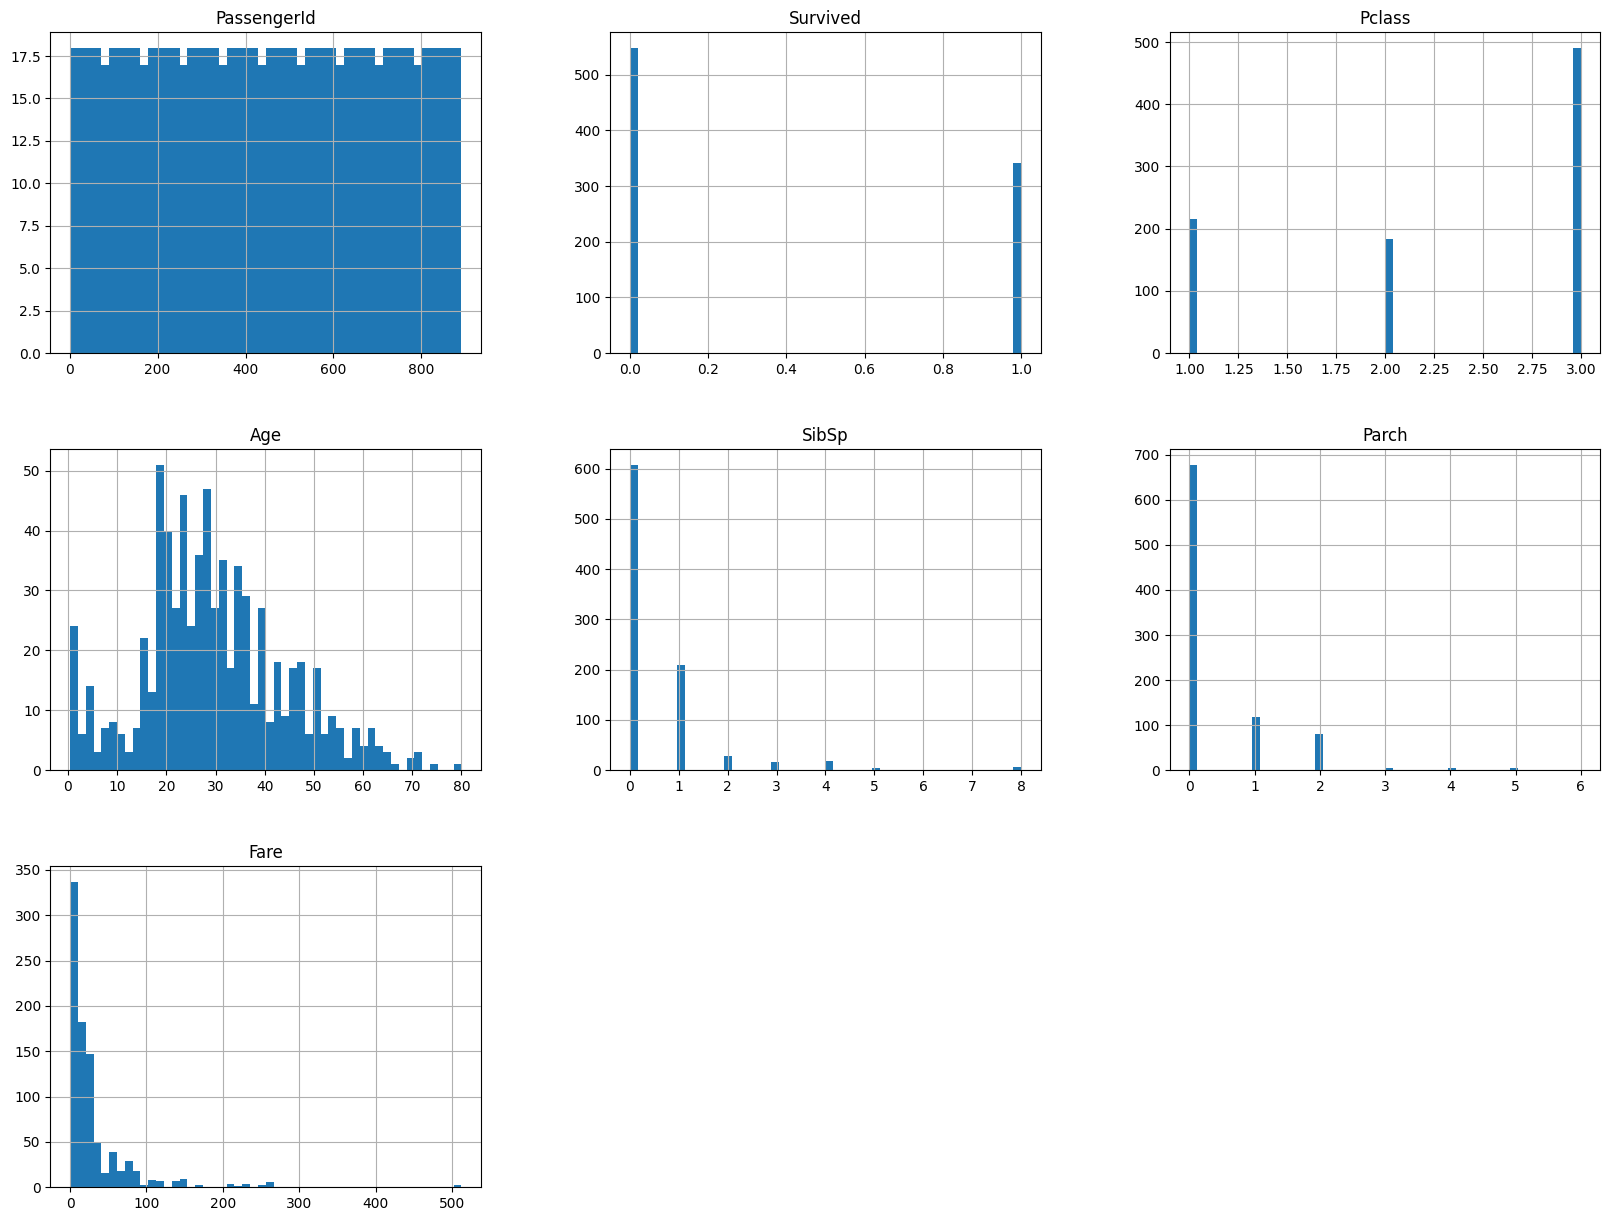

In [6]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis
Multivariate analysis is used to determine the correlation between features and targets, namely the prediction of passenger safety in the Titanic ship accident. In this process, temporary assumptions can be obtained regarding what characteristics have a higher life expectancy in the Titanic ship accident.

<ipython-input-8-138b6207e9a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Survived", kind="bar", dodge=False, height = 4, aspect = 3,  data=data_train, palette="Set3")
<ipython-input-8-138b6207e9a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Survived", kind="bar", dodge=False, height = 4, aspect = 3,  data=data_train, palette="Set3")


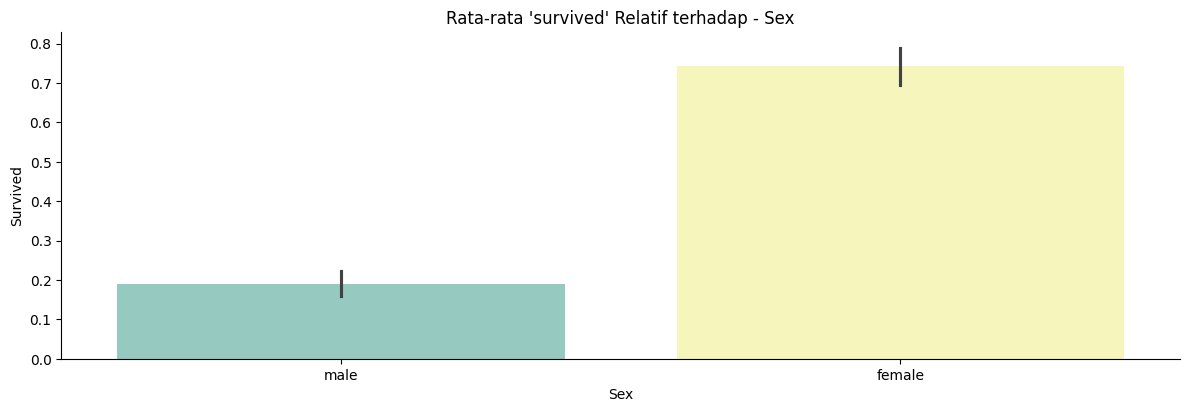

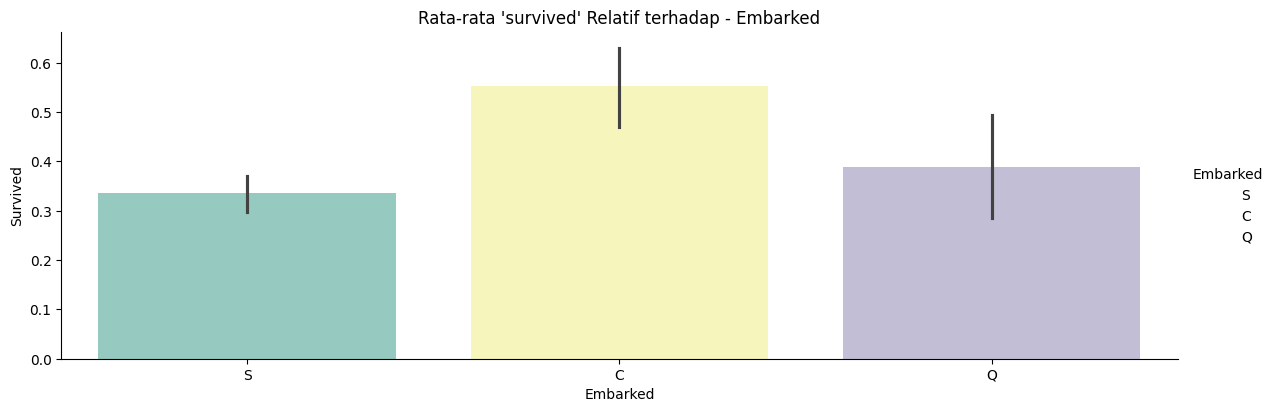

In [8]:
cat_features = data_train.select_dtypes(include='object').columns.to_list()

for col in categorical_features:
  sns.catplot(x=col, y="Survived", kind="bar", dodge=False, height = 4, aspect = 3,  data=data_train, palette="Set3")
  plt.title("Rata-rata 'survived' Relatif terhadap - {}".format(col))

> Berdasarkan variabel kategori dapat disimpulkan bahwa karakteristik orang yang memiliki kemungkinan lebih untuk hidup ketika terjadi kecelakaan kapal Titanic adalah perempuan dan yang berangkat dari pelabuhan Cherbourg.

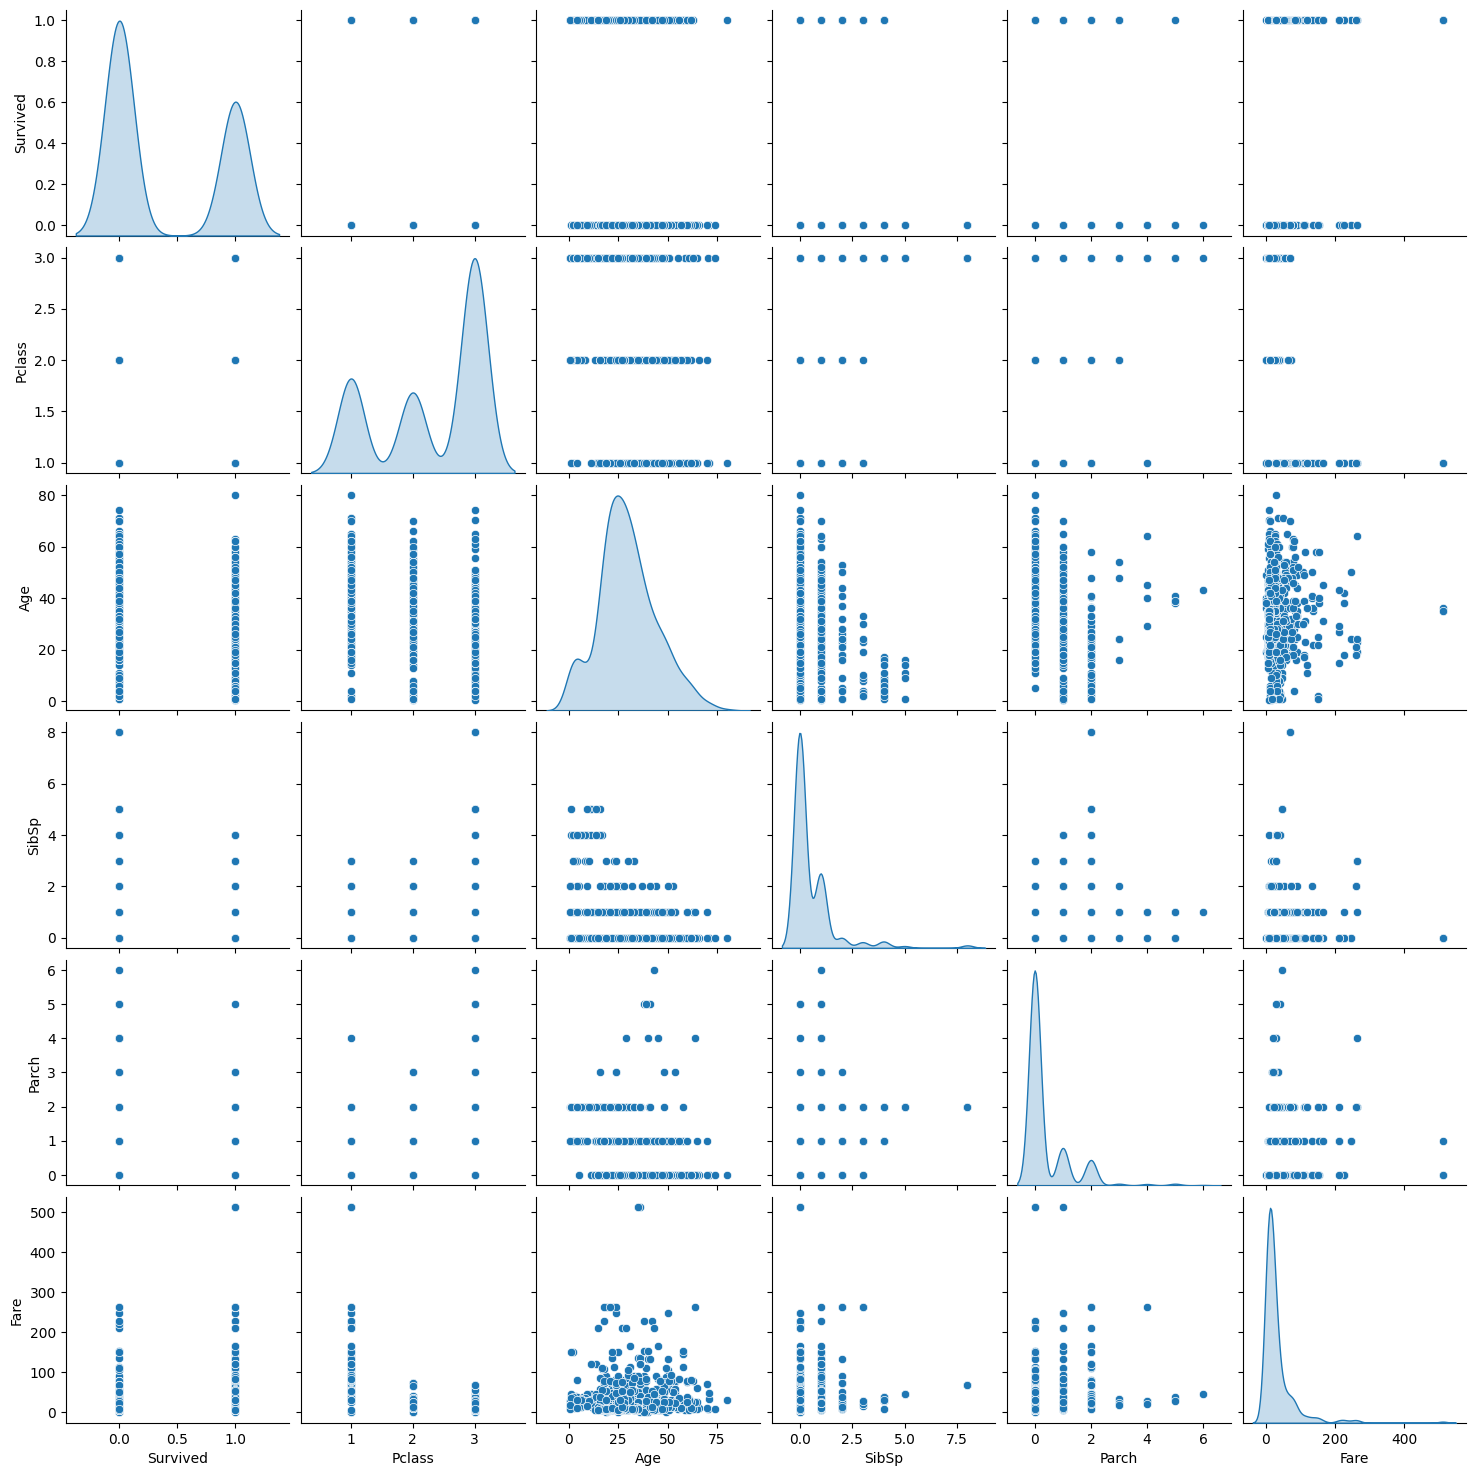

In [9]:
# Observing the relationship between numeric features with the pairplot() function
sns.pairplot(data_train[numerical_features], diag_kind = 'kde')

>It can be seen from the image above that each variable has a random correlation with other variables.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

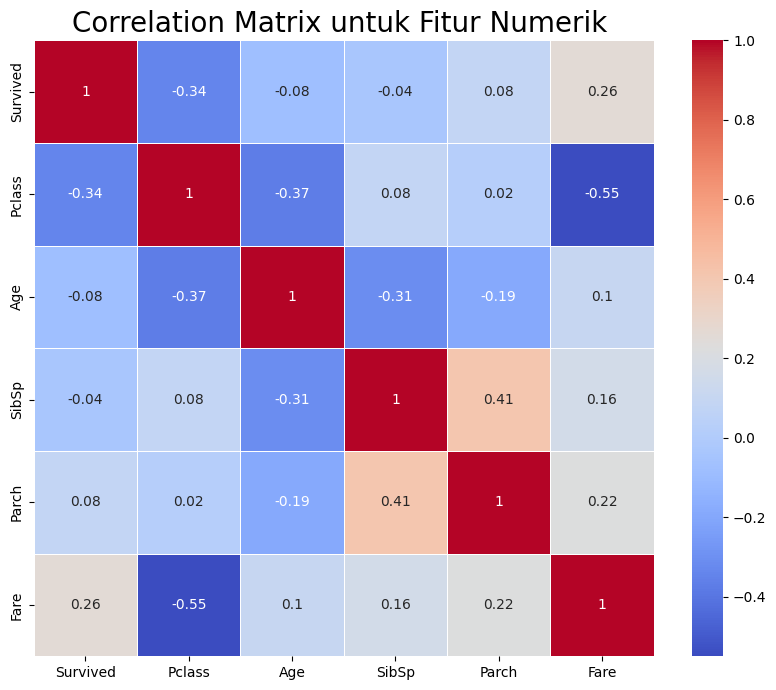

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_train[numerical_features].corr().round(2)

# To print the value in the box, use the not=True parameter
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

>Based on the image above, it can be seen that each variable has a low correlation with other variables. Meanwhile, the most influential variable among others on passenger safety in the Titanic ship accident is the fare or passenger tariff.

## 4. Data Preparation

---
    
| ⚡ Description: Data preparation ⚡ |
| :--------------------------- |
| These preparation steps aim encoding caracter or object data, normalitation, and extract important features for further analysis. |

---

### Handling missing value and Noise
>After analyzing the variables, it is necessary to clean the dataset so that it can be processed properly. In this project, cleaning will be carried out on several variables. The first will be the deletion of rows that have empty data on the Age and Embarked variables.

In [11]:
# Create a new DataFrame (clean_df) by removing rows that have missing values ​​(NaN) from data_train
clean_df = data_train.dropna(subset=['Age'])

In [12]:
clean_df = clean_df.dropna(subset=['Embarked'])

>Then it was decided that several variables would be removed because they were noise or redundant that had no effect on the prediction model in this project. The data were unique data that were not factors in the life or death of passengers in the Titanic accident because they did not cause it to happen at all. The variables to be removed included, Passenger ID, name, ticket number, and cabin number,

In [13]:
# Removing noise from a dataset
clean_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


### Feature Encoding
To perform the process of encoding category features, one of the common techniques is the one-hot-encoding technique. The scikit-learn library provides this function to obtain new appropriate features so that they can represent category variables. In this project, there are two category variables, namely 'sex' and 'embarked'. This encoding process is carried out so that variables whose values ​​are objects can become numeric values ​​so that they can be processed. This encoding process is carried out with the get_dummies feature.

In [ ]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

data_final = pd.concat([clean_df, pd.get_dummies(clean_df['Sex'], prefix='Sex').astype(int)],axis=1)
data_final = pd.concat([data_final, pd.get_dummies(data_final['Embarked'], prefix='Embarked').astype(int)],axis=1)
data_final.drop(['Sex','Embarked'], axis=1, inplace=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Sex_female  712 non-null    int64  
 7   Sex_male    712 non-null    int64  
 8   Embarked_C  712 non-null    int64  
 9   Embarked_Q  712 non-null    int64  
 10  Embarked_S  712 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.8 KB


In [ ]:
data_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Over Sampling
Over-sampling is a technique to balance the amount of data between the majority and minority classes in an imbalanced dataset. The method used for over-sampling in this project is RandomOverSampler from the imbalanced-learn library. This technique adds random copies of samples in the minority class until the number is balanced with the majority class. In this case, the oversampling process is done to balance the records that have survived values ​​0 and 1.

In [ ]:
X = data_final.drop(["Survived"],axis =1)
y = data_final["Survived"]

In [ ]:
# Oversampling use RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

### Splitting Data
`train_test_split()` is a function from the scikit-learn library that is used to split a dataset into two or more parts, such as a training set and a testing set. This separation is important in machine learning to evaluate model performance using data that the model never saw during training, thus providing a more realistic picture of how the model performs on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X_resampled)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 848
Total # of sample in train dataset: 763
Total # of sample in test dataset: 85


### Normalization
Normalization or standardization of data is the process of changing the scale of numeric features so that they have certain statistical properties, usually with the aim of making machine learning models more stable and accurate. The method used for normalization in this project is using StandardScaler() from the scikit-learn library.

In [ ]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Pclass,Age,SibSp,Parch,Fare
538,0.939823,-0.644227,-0.564537,-0.521939,-0.500496
49,0.939823,-0.713478,-0.564537,-0.521939,-0.520153
523,0.939823,0.463791,-0.564537,-0.521939,-0.532361
786,-0.255318,0.325289,0.551375,0.666835,-0.071598
483,-0.255318,-0.367223,0.551375,1.855608,0.527293


In [ ]:
X_train[numerical_features].describe().round(4)

,Pclass,Age,SibSp,Parch,Fare
count,763.0000,763.0000,763.0000,763.0000,763.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007
min,-1.4505,-2.0002,-0.5645,-0.5219,-0.6705
25%,-1.4505,-0.6442,-0.5645,-0.5219,-0.5221
50%,-0.2553,-0.0902,-0.5645,-0.5219,-0.3738
75%,0.9398,0.6023,0.5514,0.6668,-0.0048
max,0.9398,3.5108,5.0150,6.6107,8.7704


In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
538,0.939823,-0.644227,-0.564537,-0.521939,-0.500496,0,1,0,0,1
49,0.939823,-0.713478,-0.564537,-0.521939,-0.520153,0,1,0,0,1
523,0.939823,0.463791,-0.564537,-0.521939,-0.532361,0,1,0,0,1
786,-0.255318,0.325289,0.551375,0.666835,-0.071598,1,0,0,0,1
483,-0.255318,-0.367223,0.551375,1.855608,0.527293,1,0,0,0,1


## 5. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the Support Vector Machine, Random Forest, and K-Nearest Neighbors model that has been created. |

---

### Support Vector Machine

Creating an SVM model with the best parameters.

In [ ]:
# create an SVC object and call the fit function to train the model
svm = SVC(kernel='rbf', C=128, gamma=2048)
svm.fit(X_train, y_train)

SVC(C=128, gamma=2048)

### Random Forest

Creating an random forest model with the best parameters.

In [ ]:
# Initialize RF and call the fit function to train the model
RF = RandomForestClassifier(class_weight='balanced', random_state=42)
RF.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### K-Nearest Neighbors

Creation of K-Nearest Neighbors model with best parameters.

In [ ]:
# Initialize the KNN model with k=3 and call the fit function to train the model
knn = KNeighborsClassifier(n_neighbors=3,
    weights='distance',     # Assign weights based on distance (closer neighbors have greater weight)
    algorithm='auto',       # Automatically select algorithm based on data
    leaf_size=30,           # Leaf size for Ball Tree or KD Tree
    p=1,                    # Using Euclidean distance (p=2)
    metric='manhattan',     # Minkowski distance metric
    n_jobs=-1     )

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3, p=1,
                     weights='distance')

## 6. Evaluation Model

---
    
| ⚡ Description: Data preprocessing ⚡ |
| :--------------------------- |
| Model evaluation in classification models is very important to determine how well the model can predict the class of new data. This evaluation uses various metrics to assess the performance of the model, which includes the model's ability to correctly distinguish positive and negative classes. Here are some of the metrics used in this project, namely accuracy score, precision score, recall score, and f1-score.|

---

In [ ]:
# Scale the numeric features on X_test so that it has a mean=0 and variance=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-22-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.9398226  -1.45045954 -1.45045954  0.9398226  -0.25531847 -1.45045954
 -1.45045954 -0.25531847 -0.25531847 -0.25531847  0.9398226   0.9398226
  0.9398226  -1.45045954 -0.25531847  0.9398226   0.9398226   0.9398226
  0.9398226  -0.25531847  0.9398226  -1.45045954 -1.45045954  0.9398226
 -0.25531847 -0.25531847 -0.25531847 -0.25531847 -1.45045954 -0.25531847
 -1.45045954 -1.45045954  0.9398226   0.9398226  -1.45045954 -1.45045954
 -1.45045954 -0.25531847 -0.25531847  0.9398226  -1.45045954 -1.45045954
  0.9398226  -0.25531847  0.9398226   0.9398226  -1.45045954  0.9398226
 -0.25531847 -0.25531847 -1.45045954  0.9398226  -1.45045954  0.9398226
  0.9398226   0.9398226   0.9398226   0.9398226  -0.25531847 -1.45045954
 -0.25531847  0.9398226  -0.25531847  0.9398226   0.9398226   0.9398226
  0.9398226  -1.45045954  0.9398226  -1.45045954  

In [ ]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
664,0.939823,-0.782729,-0.564537,-0.521939,-0.517542,0,1,0,0,1
363,-1.450460,1.364056,0.551375,-0.521939,0.971472,0,1,1,0,0
110,-1.450460,-0.367223,-0.564537,-0.521939,0.788963,0,1,1,0,0
678,0.939823,-1.405989,0.551375,0.666835,-0.389549,1,0,1,0,0
39,-0.255318,-0.020967,0.551375,-0.521939,-0.191376,1,0,0,0,1


### Support Vector Machine
The following is the process for obtaining accuracy values ​​in the support vector machine model.

In [ ]:
# Predicting test data
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Evaluation using various metrics
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Showing accuracy
print('svm - accuracy_train:', accuracy_train_svm)
print('svm - accuracy_test:', accuracy_test_svm)

svm - accuracy_train: 0.9764089121887287
svm - accuracy_test: 0.8705882352941177


### Random Forest
The following is the process for obtaining accuracy values ​​in the random forest model.

In [ ]:
# Predicting test data
y_pred_train_RF = RF.predict(X_train)
y_pred_test_RF = RF.predict(X_test)

# Evaluation using various metrics
accuracy_train_RF = accuracy_score(y_pred_train_RF, y_train)
accuracy_test_RF = accuracy_score(y_pred_test_RF, y_test)

# Showing accuracy
print('RF - accuracy_train:', accuracy_train_RF)
print('RF - accuracy_test:', accuracy_test_RF)

RF - accuracy_train: 0.9842726081258192
RF - accuracy_test: 0.9058823529411765


### K-Naerest Neighbors
The following is the process for obtaining accuracy values ​​in the k-nearest neighbors model.

In [ ]:
# Predicting test data
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Evaluation using various metrics
accuracy_train_knn = accuracy_score(y_pred_train_knn, y_train)
accuracy_test_knn = accuracy_score(y_pred_test_knn, y_test)

# Showing accuracy
print('knn - accuracy_train:', accuracy_train_knn)
print('knn - accuracy_test:', accuracy_test_knn)

knn - accuracy_train: 0.9842726081258192
knn - accuracy_test: 0.8352941176470589


In [ ]:
# Create a confusion matrix for each model
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_RF)
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Displaying confusion matrix and classification report
print("Confusion Matrix - Random Forest:")
print(conf_matrix_rf)
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_test_RF))

print("\nConfusion Matrix - SVM:")
print(conf_matrix_svm)
print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

print("\nConfusion Matrix - K-Nearest Neighbors:")
print(conf_matrix_knn)
print("\nClassification Report - K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_test_knn))

Confusion Matrix - Random Forest:
[[38  7]
 [ 1 39]]

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.85      0.97      0.91        40

    accuracy                           0.91        85
   macro avg       0.91      0.91      0.91        85
weighted avg       0.91      0.91      0.91        85


Confusion Matrix - SVM:
[[44  1]
 [10 30]]

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        45
           1       0.97      0.75      0.85        40

    accuracy                           0.87        85
   macro avg       0.89      0.86      0.87        85
weighted avg       0.89      0.87      0.87        85


Confusion Matrix - K-Nearest Neighbors:
[[32 13]
 [ 1 39]]

Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0      

In [ ]:
# Create a DataFrame for accuracy results
results_df = pd.DataFrame({
    'Model': [ 'Support Vector Machines', 'Random Forest', 'K-Nearest Neighbor'],
    'Accuracy Train': [ accuracy_train_svm, accuracy_train_RF, accuracy_train_knn ],
    'Accuracy Test': [ accuracy_test_svm, accuracy_test_RF, accuracy_test_knn ]
})
# Showing only the "Accuracy Test" column
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                     Model  Accuracy Test
0  Support Vector Machines       0.870588
1            Random Forest       0.905882
2       K-Nearest Neighbor       0.835294


>After evaluating the best model, namely the random forest classification of Titanic passengers, the following results were obtained:
Obtained
- **Accuracy:** 91%
- **Precision for the "Survivor" Class:** 85%
- **Recall for the "Survivor" Class:** 97%
- **F1 Score for the "Survivor" Class:** 91%

>Explanation of the results based on these metrics:
- **Accuracy of 91%** indicates that the model correctly classifies 91% of the samples. However, considering that accuracy can be affected by class imbalance, we also need to look at precision and recall.
- **Precision of 85%** indicates that 85% of the passengers predicted to be "survivors" actually survived. This shows that the model is quite good at avoiding false positives (passengers who did not survive but were predicted to survive).
- **Recall of 97%** indicates that the model successfully identified 97% of all passengers who actually survived. The model is quite good, because there is only a chance that 3% of passengers who should have survived were not identified by the model (false negatives).
- **F1 Score 91%** provides a comprehensive picture of the balance between precision and recall. This shows that the model has a balanced performance in capturing survivors while minimizing prediction errors.

## 7. Prediction

---
    
| ⚡ Description: Prediction ⚡ |
| :--------------------------- |
|In this section, we will make predictions on new data to determine the probability of safety for each passenger based on existing factors or variables.|

---

### Loading data test

In [ ]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis (EDA)

In [ ]:
data_final = data_test.copy()
data_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> Removing noise from the dataset

In [ ]:
# remove noise from dataset
data_final.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
data_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Data Preparation

>Perform categorical data encoding on test data

In [ ]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

data_test_final = pd.concat([data_final, pd.get_dummies(data_final['Sex'], prefix='Sex').astype(int)],axis=1)
data_test_final = pd.concat([data_test_final, pd.get_dummies(data_test_final['Embarked'], prefix='Embarked').astype(int)],axis=1)
data_test_final.drop(['Sex','Embarked'], axis=1, inplace=True)
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         332 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_female  418 non-null    int64  
 6   Sex_male    418 non-null    int64  
 7   Embarked_C  418 non-null    int64  
 8   Embarked_Q  418 non-null    int64  
 9   Embarked_S  418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


>Perform normalization on test data

In [ ]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
scaler.fit(data_test_final[numerical_features])
data_test_final[numerical_features] = scaler.transform(data_test_final.loc[:, numerical_features])
data_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.298549,-0.499470,-0.400248,-0.497811,0,1,0,1,0
1,0.873482,1.181328,0.616992,-0.400248,-0.512660,1,0,0,0,1
2,-0.315819,2.240662,-0.499470,-0.400248,-0.464532,0,1,0,1,0
3,0.873482,-0.231118,-0.499470,-0.400248,-0.482888,0,1,0,0,1
4,0.873482,-0.584229,0.616992,0.619896,-0.417971,1,0,0,0,1


### Prediction with The Best Model

In [ ]:
# Melakukan prediksi pada seluruh data
data_test['prediction'] = RF.predict(data_test_final)

# Menyimpan DataFrame ke dalam file Excel
data_test.to_excel('hasil_prediksi.xlsx', index=False)

print("DataFrame dengan hasil prediksi:")
print(data_test.head())

DataFrame dengan hasil prediksi:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  prediction  
0  34.5      0      0   330911   7.8292   NaN        Q           0  
1  47.0      1      0   363272   7.0000   NaN        S           0  
2  62.0      0      0   240276   9.6875   NaN        Q           0  
3  27.0      0      0   315154   8.6625   NaN        S           0  
4  22.0      1      1  3101298  12.2875   NaN        S           1  


# Export requirements.txt
This section will export the libraries used in this project in the form of a .txt file.

In [ ]:
pip freeze > requirements.txt